## To-do:

1. Compute coefficients of MW in isolation for all the resolutions.
2. Run gadget for the MW dm halo particles to compute a.
3. Compare a from BFE and Gadget
4. Do the 3 for MW+LMC sims
5. Compute mwlmc coeff
6. Discrepancy of phi at larger radii (**no idea, ask tomorrow**)
7. Truncate halo. (**Truncating the halo don't change the difference in the potential at larger radii**)

In [4]:
%pylab inline
import biff
from scipy import special
import pygadgetreader
import reading_snapshots
from gadget_read_snap import read_snap

Populating the interactive namespace from numpy and matplotlib


In [5]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)


In [6]:
r_s_sims = 40.85
G_gadget=43007.1 #kpc3/(Gyr2Msun)/1E10. 

In [18]:
## Read coefficients here

In [19]:
## Compute accleration and potential 

In [32]:
pot_lmc_biff = biff.potential(np.double(pos_lmc), S_lmc, T_lmc, G=G_gadget, M=1, r_s=3)

In [33]:
pot_lmc_biff_000 = biff.potential(np.double(pos_lmc), S_lmc_000, T_lmc_000, G=G_gadget, M=1, r_s=3)

In [ ]:
## Compare gadget and BFEs here.

In [10]:
rlmc = np.sqrt(pos_lmc[:,0]**2 + pos_lmc[:,1]**2 + pos_lmc[:,2]**2)
r30 = np.where(rlmc<30)[0]

In [4]:
def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

In [5]:
def copy_matrix(M, indices):
    M_new = np.zeros(shape(M))
    for i in range(len(indices[0])):
        M_new[indices[0][i]][indices[1][i]][indices[2][i]] = M[indices[0][i]][indices[1][i]][indices[2][i]]
    return M_new
    
def coefficients_energy_level(S, T, e_cut, verb=0):
    """
    Returns coefficients with energy higher than e_cut
    e_cut : float 
        between 0 and 1
        
    """
    n_max = shape(S)[0]
    l_max = shape(S)[1]
    m_max = shape(S)[2]
    
    
    A_nl_array = np.zeros((n_max, l_max))
    for j in range(n_max):
        for i in range(l_max):
            A_nl_array[j][i] = Anl(j, i)
    A_nl_matrix = np.zeros((n_max, l_max, m_max))
    for i in range(m_max):
        A_nl_matrix[:,:,i] = A_nl_array
    
    U_nlm = 0.5*(S**2 + T**2)/A_nl_matrix
    U_all = np.sum(U_nlm)
    energy_cut = np.where(np.log10(np.abs(U_nlm))>np.log10(np.abs(U_all))*e_cut)
    if verb == 1:
        print('\sum U = ',np.log10(np.abs(U_all)))
        print('U cut = ',np.log10(np.abs(U_all))*e_cut)
        print('N coeff = ', len(energy_cut[0]))

    S_new = copy_matrix(S, energy_cut)
    T_new = copy_matrix(T, energy_cut)
    return S_new, T_new, [np.max(energy_cut[0]) ,np.max(energy_cut[1]), np.max(energy_cut[2])]
    
    

In [4]:
#S_lmc_95, T_lmc_95, coeff = coefficients_energy_level(S_lmc, T_lmc, 0.95)


In [7]:
n_max = l_max = m_max = 21
A_nl_array = np.zeros((n_max, l_max))
for j in range(n_max):
    for i in range(l_max):
        A_nl_array[j][i] = Anl(j, i)
A_nl_matrix = np.zeros((n_max, l_max, m_max))
for i in range(m_max):
    A_nl_matrix[:,:,i] = A_nl_array

In [9]:
r_s_sims = 40.85

In [53]:
MW_mass = pygadgetreader.readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'mass', 'dm')

Returning DM    Mass


In [54]:
MW_mass[0]

1.5772125e-06

## Gadget acceleration:

In [25]:
snap_gadget_1e6 = read_snap('./MW/gadget3_MW5_100M_b1_dmhalopart_elgato_1e6_001')

256
12000000 blocksize pp
4000000 blocksize ids
4000000 blocksize mass


In [294]:
snap_gadget_1e7 = read_snap('./MW/gadget3_MW5_100M_b1_dmhalopart_elgato_1e7_001')

256
120000000 blocksize pp
40000000 blocksize ids
40000000 blocksize mass


In [411]:
snap_gadget_1e8 = read_snap('./MWLMC/gadget3_MW5_100M_b1_dmhalopart_elgato_1e8_001')

256
1200000000 blocksize pp
400000000 blocksize ids
400000000 blocksize mass


In [26]:
acc_gadget_1e6 = snap_gadget_1e6[2]
pos_gadget_1e6 = snap_gadget_1e6[0]
pot_gadget_1e6 = snap_gadget_1e6[1]

In [295]:
acc_gadget_1e7 = snap_gadget_1e7[2]
pos_gadget_1e7 = snap_gadget_1e7[0]
pot_gadget_1e7 = snap_gadget_1e7[1]

In [412]:
acc_gadget_1e8 = snap_gadget_1e8[2]
pos_gadget_1e8 = snap_gadget_1e8[0]
pot_gadget_1e8 = snap_gadget_1e8[1]

In [413]:
r_sims_1e6 = (pos_gadget_1e6[:,0]**2 + pos_gadget_1e6[:,1]**2 + pos_gadget_1e6[:,2]**2)**0.5
r_sims_1e7 = (pos_gadget_1e7[:,0]**2 + pos_gadget_1e7[:,1]**2 + pos_gadget_1e7[:,2]**2)**0.5
r_sims_1e8 = (pos_gadget_1e8[:,0]**2 + pos_gadget_1e8[:,1]**2 + pos_gadget_1e8[:,2]**2)**0.5

In [196]:
N_rand_1e6 = np.random.randint(0, 1000000, 5000)

In [296]:
N_rand_1e7 = np.random.randint(0, 10000000, 5000)

In [414]:
N_rand_1e8 = np.random.randint(0, 100000000, 5000)

(-100, 100)

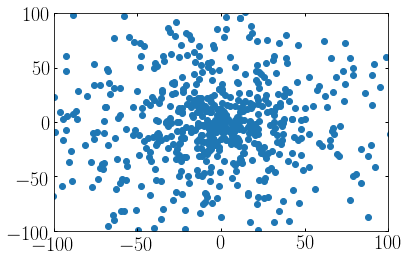

In [32]:
scatter(pos_gadget_1e6[N_rand_1e6,0], pos_gadget_1e6[N_rand_1e6,1])
xlim(-100, 100)
ylim(-100, 100)

(0, 40)

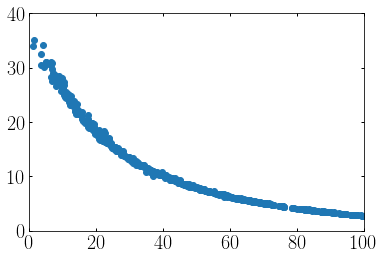

In [37]:
scatter(r_sims_1e6[N_rand_1e6], -ar_1e6[N_rand_1e6])
xlim(0, 100)
ylim(0, 40)

(-30, 30)

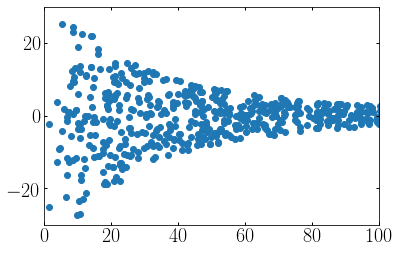

In [57]:
scatter(r_sims_1e6[N_rand_1e6], acc_gadget_1e6[N_rand_1e6,0])
xlim(0, 100)
ylim(-30, 30)

## BFE acceleration:

In [22]:
## Reading coefficients 
coeff_c = np.loadtxt('MW/MW_bfe_b1_1e6.txt')
S_mw_1e6 = coeff_c[:,0]
T_mw_1e6 = coeff_c[:,1]

S_matrix_mw_1e6 = np.zeros((21, 21, 21))
T_matrix_mw_1e6 = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(0, l+1):
            S_matrix_mw_1e6[n][l][m] = S_mw_1e6[counter]
            T_matrix_mw_1e6[n][l][m] = T_mw_1e6[counter]
            counter +=1

In [197]:
a_mwlmc_biff_1e6 = biff.gradient(np.double(pos_gadget_1e6[N_rand_1e6]), S_matrix_mw_1e6, T_matrix_mw_1e6, G=G_gadget, M=1, r_s=r_s_sims)

In [198]:
pot_mwlmc_biff_1e6 = biff.potential(np.double(pos_gadget_1e6[N_rand_1e6]), S_matrix_mw_1e6, T_matrix_mw_1e6, G=G_gadget, M=1, r_s=r_s_sims)

In [45]:
len(a_mwlmc_biff_1e6[:,0])

1000

(0, 100)

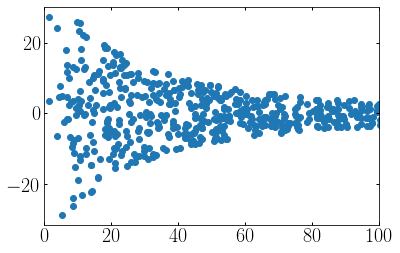

In [54]:
scatter(r_sims_1e6[N_rand_1e6], a_mwlmc_biff_1e6[:,0])
xlim(0, 100)

In [117]:
## Comparing accelerations

In [297]:
## Reading coefficients 
coeff_c7 = np.loadtxt('MW/MW_bfe_b1_1e7.txt')
S_mw_1e7 = coeff_c7[:,0]
T_mw_1e7 = coeff_c7[:,1]

S_matrix_mw_1e7 = np.zeros((21, 6, 6))
T_matrix_mw_1e7 = np.zeros((21, 6, 6))


counter = 0
for n in range(21):
    for l in range(6):
        for m in range(0, l+1):
            S_matrix_mw_1e7[n][l][m] = S_mw_1e7[counter]
            T_matrix_mw_1e7[n][l][m] = T_mw_1e7[counter]
            counter +=1
            
            
            


In [421]:
## Reading coefficients 
coeff_c8 = np.loadtxt('MW/MW_bfe_b1_1e8.txt')
S_mw_1e8 = coeff_c8[:,0]
T_mw_1e8 = coeff_c8[:,1]

S_matrix_mw_1e8 = np.zeros((21, 3, 3))
T_matrix_mw_1e8 = np.zeros((21, 3, 3))


counter = 0
for n in range(21):
    for l in range(3):
        for m in range(0, l+1):
            S_matrix_mw_1e8[n][l][m] = S_mw_1e8[counter]
            T_matrix_mw_1e8[n][l][m] = T_mw_1e8[counter]
            counter +=1

In [299]:
a_mwlmc_biff_1e7 = biff.gradient(np.double(pos_gadget_1e7[N_rand_1e7]), S_matrix_mw_1e7, T_matrix_mw_1e7, G=G_gadget, M=1, r_s=r_s_sims)

In [422]:
a_mwlmc_biff_1e8 = biff.gradient(np.double(pos_gadget_1e8[N_rand_1e8]), S_matrix_mw_1e8, T_matrix_mw_1e8, G=G_gadget, M=1, r_s=r_s_sims)

In [369]:
pot_mwlmc_biff_1e7 = biff.potential(np.double(pos_gadget_1e7[N_rand_1e7]), S_matrix_mw_1e7, T_matrix_mw_1e7, G=G_gadget, M=1, r_s=r_s_sims)

In [423]:
pot_mwlmc_biff_1e8 = biff.potential(np.double(pos_gadget_1e8[N_rand_1e8]), S_matrix_mw_1e8, T_matrix_mw_1e8, G=G_gadget, M=1, r_s=r_s_sims)

In [424]:
S_000_1e8 = np.zeros((21, 3, 3))
T_000_1e8 = np.zeros((21, 3, 3))
S_000_1e8[0][0][0] = S_matrix_mw_1e8[0][0][0]
T_000_1e8[0][0][0] = S_matrix_mw_1e8[0][0][0]

In [376]:
S_000_1e7 = np.zeros((21, 6, 6))
T_000_1e7 = np.zeros((21, 6, 6))
S_000_1e7[0][0][0] = S_matrix_mw_1e7[0][0][0]
T_000_1e7[0][0][0] = S_matrix_mw_1e7[0][0][0]

In [382]:
S_000_1e6 = np.zeros((21, 6, 6))
T_000_1e6 = np.zeros((21, 6, 6))
S_000_1e6[0][0][0] = S_matrix_mw_1e6[0][0][0]
T_000_1e6[0][0][0] = S_matrix_mw_1e6[0][0][0]

In [430]:
a_mwlmc_biff_1e8_000 = biff.gradient(np.double(pos_gadget_1e8[N_rand_1e8]), S_000_1e8, T_000_1e8, G=G_gadget, M=1, r_s=r_s_sims)
a_mwlmc_biff_1e7_000 = biff.gradient(np.double(pos_gadget_1e7[N_rand_1e7]), S_000_1e7, T_000_1e7, G=G_gadget, M=1, r_s=r_s_sims)
a_mwlmc_biff_1e6_000 = biff.gradient(np.double(pos_gadget_1e6[N_rand_1e6]), S_000_1e6, T_000_1e6, G=G_gadget, M=1, r_s=r_s_sims)


In [440]:
pot_mwlmc_biff_1e8_000 = biff.potential(np.double(pos_gadget_1e8[N_rand_1e8]), S_000_1e8, T_000_1e8, G=G_gadget, M=1, r_s=r_s_sims)
pot_mwlmc_biff_1e7_000 = biff.potential(np.double(pos_gadget_1e7[N_rand_1e7]), S_000_1e7, T_000_1e7, G=G_gadget, M=1, r_s=r_s_sims)
pot_mwlmc_biff_1e6_000 = biff.potential(np.double(pos_gadget_1e6[N_rand_1e6]), S_000_1e6, T_000_1e6, G=G_gadget, M=1, r_s=r_s_sims)


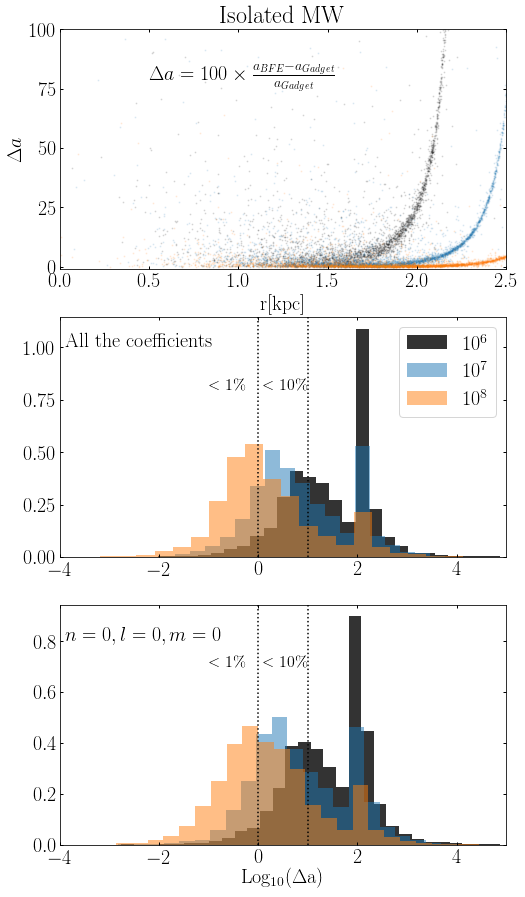

In [441]:
r_sort = argsort(r_sims_1e6[N_rand_1e6])
r_sort2 = argsort(r_sims_1e7[N_rand_1e7])
r_sort3 = argsort(r_sims_1e8[N_rand_1e8])

figure(figsize=(8, 15))

subplot(3, 1, 1)
title('Isolated MW')

scatter(np.log10(r_sims_1e6[N_rand_1e6][r_sort]), 100*np.abs(-a_mwlmc_biff_1e6[r_sort,0]-acc_gadget_1e6[N_rand_1e6,0][r_sort])/np.abs(acc_gadget_1e6[N_rand_1e6,0][r_sort]), 
         c='k', alpha=0.1, s=1)


scatter(np.log10(r_sims_1e7[N_rand_1e7][r_sort2]), 100*np.abs(-a_mwlmc_biff_1e7[r_sort2,0]-acc_gadget_1e7[N_rand_1e7,0][r_sort2])/np.abs(acc_gadget_1e7[N_rand_1e7,0][r_sort2]), 
         c='C0', alpha=0.1, s=1)

scatter(np.log10(r_sims_1e8[N_rand_1e8][r_sort3]), 100*np.abs(-a_mwlmc_biff_1e8[r_sort3,0]-acc_gadget_1e8[N_rand_1e8,0][r_sort3])/np.abs(acc_gadget_1e8[N_rand_1e8,0][r_sort3]), 
         c='C1', alpha=0.1, s=1)

xlim(0, 2.5)
ylim(-1, 100)

ylabel('$\Delta a$')
xlabel('r[kpc]')

text(0.5, 75, r'$\Delta a = 100 \times \frac{a_{BFE} - a_{Gadget}}{a_{Gadget}}$')



subplot(3, 1, 2)
text(-3.9, 1, 'All the coefficients')
h = hist(np.log10(100*np.abs(-a_mwlmc_biff_1e6[r_sort,0]-acc_gadget_1e6[N_rand_1e6,0][r_sort])/np.abs(acc_gadget_1e6[N_rand_1e6,0][r_sort]))
        , bins=30, color='k', alpha=0.8, label='$10^{6}$', normed=True)

h = hist(np.log10(100*np.abs(-a_mwlmc_biff_1e7[r_sort2,0]-acc_gadget_1e7[N_rand_1e7,0][r_sort2])/np.abs(acc_gadget_1e7[N_rand_1e7,0][r_sort2]))
        , bins=30, alpha=0.5, label='$10^{7}$', normed=True)

h = hist(np.log10(100*np.abs(-a_mwlmc_biff_1e8[r_sort3,0]-acc_gadget_1e8[N_rand_1e8,0][r_sort3])/np.abs(acc_gadget_1e8[N_rand_1e8,0][r_sort3]))
        , bins=30, alpha=0.5, label='$10^{8}$', normed=True)

legend()
axvline(np.log10(1), c='k', ls=':')
axvline(np.log10(10), c='k', ls=':')
xlim(-4, 5)
text(-1, 0.8, r'$<1\%$', fontsize=16)
text(0.1, 0.8, r'$<10\%$', fontsize=16)


subplot(3, 1, 3)

text(-3.9, 0.8, '$n=0, l=0, m=0$')
h = hist(np.log10(100*np.abs(-a_mwlmc_biff_1e6_000[r_sort,0]-acc_gadget_1e6[N_rand_1e6,0][r_sort])/np.abs(acc_gadget_1e6[N_rand_1e6,0][r_sort]))
        , bins=30, alpha=0.8, label='$10^{7}$', normed=True, color='k')

h = hist(np.log10(100*np.abs(-a_mwlmc_biff_1e7_000[r_sort2,0]-acc_gadget_1e7[N_rand_1e7,0][r_sort2])/np.abs(acc_gadget_1e7[N_rand_1e7,0][r_sort2]))
        , bins=30, alpha=0.5, label='$10^{7}$', normed=True)

h = hist(np.log10(100*np.abs(-a_mwlmc_biff_1e8_000[r_sort3,0]-acc_gadget_1e8[N_rand_1e8,0][r_sort3])/np.abs(acc_gadget_1e8[N_rand_1e8,0][r_sort3]))
        , bins=30, alpha=0.5, label='$10^{8}$', normed=True)


axvline(np.log10(1), c='k', ls=':')
axvline(np.log10(10), c='k', ls=':')
xlim(-4, 5)

text(-1, 0.7, r'$<1\%$', fontsize=16)
text(0.1, 0.7, r'$<10\%$', fontsize=16)

xlabel(r'$\rm{Log_{10}}(\Delta a)$')

#loglog(r_sims_1e7[N_rand_1e7][r_sort], 100*np.abs(-a_mwlmc_biff_1e7[r_sort,2]-acc_gadget_1e7[N_rand_1e7,2][r_sort])/np.abs(acc_gadget_1e7[N_rand_1e7,2][r_sort]), 
#         c='k')
#xlim(0, 300)
#ylabel('$\Delta a_y$')

#subplot(3, 1, 3)
#loglog(r_sims_1e7[N_rand_1e7][r_sort], 100*np.abs(-a_mwlmc_biff_1e7[r_sort,2]-acc_gadget_1e7[N_rand_1e7,2][r_sort])/np.abs(acc_gadget_1e7[N_rand_1e7,2][r_sort]), 
#         c='k')
#xlim(0, 300)
#xlabel('r[kpc]')
#ylabel('$\Delta a_z$')

#yscale('log')
savefig('mw_iso_acc.pdf', bbox_inches='tight')
savefig('mw_iso_acc.png', bbox_inches='tight')

## Comparing potential

In [201]:
r_sort2 = argsort(r_sims_tr_1e6[N_rand_1e6])


In [362]:
-pot_gadget_1e7[N_rand_1e7][r_sort2]

array([  1.63717295e+04,   1.62860234e+04,   1.60984727e+04, ...,
         1.01414410e+07,   1.54797490e+07,   2.33192980e+07], dtype=float32)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


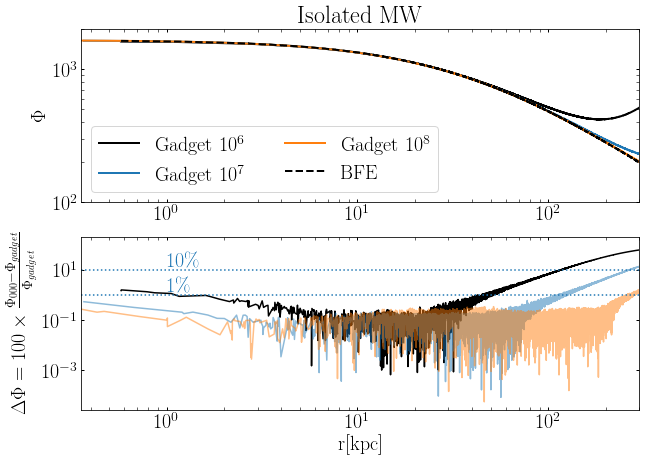

In [448]:
figure(figsize=(10, 7))
subplot(2, 1, 1)
title('Isolated MW')
loglog(r_sims_1e6[N_rand_1e6][r_sort], -pot_gadget_1e6[N_rand_1e6][r_sort], c='k', lw=2, label='Gadget $10^6$')
loglog(r_sims_1e7[N_rand_1e7][r_sort2], -pot_gadget_1e7[N_rand_1e7][r_sort2]/10., c='C0', lw=2, label='Gadget $10^7$')
loglog(r_sims_1e8[N_rand_1e8][r_sort3], -pot_gadget_1e8[N_rand_1e8][r_sort3]/100., c='C1', lw=2, label='Gadget $10^8$')

loglog(r_sims_1e6[N_rand_1e6][r_sort], -pot_mwlmc_biff_1e6[r_sort], c='k', ls='--', lw=2, label='BFE')
legend(ncol=2)
#xlim(0, 300)

ylim(10**2, 2*10**3)
xlim(0, 3*10**2)
ylabel('$\Phi$')


subplot(2, 1, 2)
loglog(r_sims_1e6[N_rand_1e6][r_sort],
       100*np.abs(np.abs(pot_mwlmc_biff_1e6_000[r_sort])-np.abs(pot_gadget_1e6[N_rand_1e6][r_sort]))/np.abs(pot_gadget_1e6[N_rand_1e6][r_sort])
      , c='k')


loglog(r_sims_1e7[N_rand_1e7][r_sort2],
       100*np.abs(np.abs(pot_mwlmc_biff_1e7_000[r_sort2])-np.abs(pot_gadget_1e7[N_rand_1e7][r_sort2]))/np.abs(pot_gadget_1e7[N_rand_1e7][r_sort2])
      , c='C0', alpha=0.5)


loglog(r_sims_1e8[N_rand_1e8][r_sort3],
       100*np.abs(np.abs(pot_mwlmc_biff_1e8_000[r_sort3])-np.abs(pot_gadget_1e8[N_rand_1e8][r_sort3]))/np.abs(pot_gadget_1e8[N_rand_1e8][r_sort3])
      , c='C1', alpha=0.5)


ylabel(r'$\Delta \Phi = 100 \times \frac{\Phi_{000} - \Phi_{gadget}}{\Phi_{gadget}}$')
xlim(0, 3*10**2)
axhline(1, ls=':')
axhline(10, ls=':')
xlabel('r[kpc]')
text(1, 1.4, '$1\%$', color='C0')
text(1, 14, '$10\%$', color='C0')

savefig('pot_iso_mw.pdf', bbox_inches='tight')

## Acceleration for high energy terms

In [269]:
def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

def copy_matrix(M, indices):
    M_new = np.zeros(shape(M))
    for i in range(len(indices[0])):
        M_new[indices[0][i]][indices[1][i]][indices[2][i]] = M[indices[0][i]][indices[1][i]][indices[2][i]]
    return M_new
    
def coefficients_energy_level(S, T, e_cut, verb=0):
    """
    Returns coefficients with energy higher than e_cut
    e_cut : float 
        between 0 and 1
        
    """
    n_max = shape(S)[0]
    l_max = shape(S)[1]
    m_max = shape(S)[2]
    
    
    A_nl_array = np.zeros((n_max, l_max))
    for j in range(n_max):
        for i in range(l_max):
            A_nl_array[j][i] = Anl(j, i)
    A_nl_matrix = np.zeros((n_max, l_max, m_max))
    for i in range(m_max):
        A_nl_matrix[:,:,i] = A_nl_array
    
    U_nlm = 0.5*(S**2 + T**2)/A_nl_matrix
    U_all = np.sum(np.abs(U_nlm))
    #print(np.abs(U_nlm))
    energy_cut = np.where((np.abs(U_nlm))>(np.abs(U_all))*e_cut)
    if verb == 1:
        print('\sum U = ',np.log10(np.abs(U_all)))
        print('U cut = ',np.log10(np.abs(U_all))*e_cut)
        print('N coeff = ', len(energy_cut[0]))

    S_new = copy_matrix(S, energy_cut)
    T_new = copy_matrix(T, energy_cut)
    print(energy_cut)
    #print( [np.max(energy_cut[0]), np.max(energy_cut[1]), np.max(energy_cut[2])])
    return S_new, T_new, [np.max(energy_cut[0]), np.max(energy_cut[1]), np.max(energy_cut[2])]
    

\sum U =  -0.38202487905
U cut =  -0.0
N coeff =  4413
(array([ 0,  0,  0, ..., 20, 20, 20]), array([ 0,  1,  1, ..., 20, 20, 20]), array([ 0,  0,  1, ..., 18, 19, 20]))
\sum U =  -0.38202487905
U cut =  -0.343822391145
N coeff =  1
(array([0]), array([0]), array([0]))


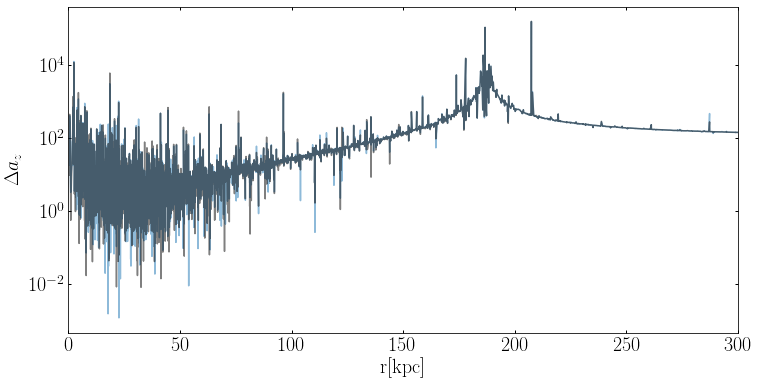

In [290]:
c1 = np.arange(0., 2)
cmap1 = plt.get_cmap("viridis", len(c1))
norm1 = matplotlib.colors.BoundaryNorm(np.arange(len(c1)+1),len(c1))
sm1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)
sm1.set_array([])


e_cuts = [0, 0.9]
coeff_order = np.zeros((len(e_cuts),3))
j=0
color = ['C0', 'k']
fig = figure(figsize=(12, 6))
for i in e_cuts:
    S, T, coeff_order[j] = coefficients_energy_level(S_matrix_mw_1e6, T_matrix_mw_1e6, i, verb=1)
    a_e = biff.gradient(np.ascontiguousarray(np.double(pos_gadget_1e6[N_rand_1e6])), S, T, G=G_gadget, M=1, r_s=r_s_sims)

    semilogy(r_sims_1e6[N_rand_1e6][r_sort], 100*np.abs(-a_e[r_sort,2]-acc_gadget_1e6[N_rand_1e6,2][r_sort])/np.abs(acc_gadget_1e6[N_rand_1e6,2][r_sort]), 
     c=color[j], alpha=0.5)
    xlim(0, 300)
    xlabel('r[kpc]')
    ylabel('$\Delta a_z$')
    j+=1